# Урок 4. Формулировка и проверка гипотез.

## Домашнее задание

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu,ttest_ind, kruskal,chisquare, pearsonr, spearmanr
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GB/22_4/data/final_ab_ds.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54976 entries, 0 to 54975
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      54976 non-null  int64  
 1   person_id       54976 non-null  int64  
 2   procalcitonine  54976 non-null  float64
 3   fibrinogen      42093 non-null  float64
 4   creatinine      54967 non-null  float64
 5   wbc             54970 non-null  float64
 6   hb              54970 non-null  float64
 7   plt             54957 non-null  float64
 8   crp             54930 non-null  float64
 9   esr             46623 non-null  float64
 10  lymph           54928 non-null  float64
 11  pneumonia       54976 non-null  int64  
 12  ihd             54976 non-null  int64  
 13  dm              54976 non-null  int64  
 14  ah              54976 non-null  int64  
 15  sex             54976 non-null  int64  
 16  len             54976 non-null  int64  
 17  age             54976 non-null 

In [4]:
df = df.dropna()

In [5]:
df.head(20)

,Unnamed: 0,person_id,procalcitonine,fibrinogen,creatinine,wbc,hb,plt,crp,esr,lymph,pneumonia,ihd,dm,ah,sex,len,age,GFR,ab_indication
1,3822,158,0.000000,8.909846,1.030282,1.363834,143.647123,644.437365,58.343027,34.424705,23.300684,1,0,0,0,1,17,56,60.894798,0
2,915492,342,0.000000,7.092240,1.027174,25.710224,130.864644,483.261016,0.800000,25.493102,27.004637,1,0,0,0,1,34,56,61.117621,0
3,641908,108,0.134918,13.265546,0.707201,0.410000,141.945473,477.671705,7.526411,46.599795,17.167563,1,0,0,0,1,26,56,95.972393,0
4,89879,108,0.000000,15.336425,1.094880,12.546527,120.607466,704.633325,27.180197,35.411333,15.268175,1,0,0,0,1,28,56,56.578279,0
5,744110,980,0.324985,9.899282,1.265045,7.001120,125.988145,166.613698,0.800000,27.280940,12.404405,1,1,0,0,1,33,48,50.257856,0
6,682124,205,0.000000,13.047944,0.777954,23.620463,144.569637,308.392879,8.999358,15.863399,17.785517,1,1,0,0,1,41,56,85.522548,0
7,908706,972,0.204717,8.516950,0.671374,31.017388,155.390774,440.785501,105.874631,27.831268,35.063580,1,1,0,0,1,48,56,102.198267,0
8,179693,243,0.159605,9.146573,0.989730,11.418947,137.050013,529.147331,13.175892,32.946863,25.367765,1,0,0,0,1,20,56,63.924039,0
9,103294,1103,0.305162,4.577210,1.061662,13.730590,135.855400,366.984412,80.341438,26.105165,10.744268,1,0,0,0,1,27,64,55.516282,0
11,576357,938,0.294488,5.396272,0.996770,0.410000,132.807655,342.620102,64.413576,28.491794,24.380682,1,0,0,0,1,26,48,67.042295,0


In [6]:
neg, pos = np.bincount(df['ab_indication'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.1f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 35680
    Positive: 8873 (24.9% of total)



Отметим, что данные несбалансированы

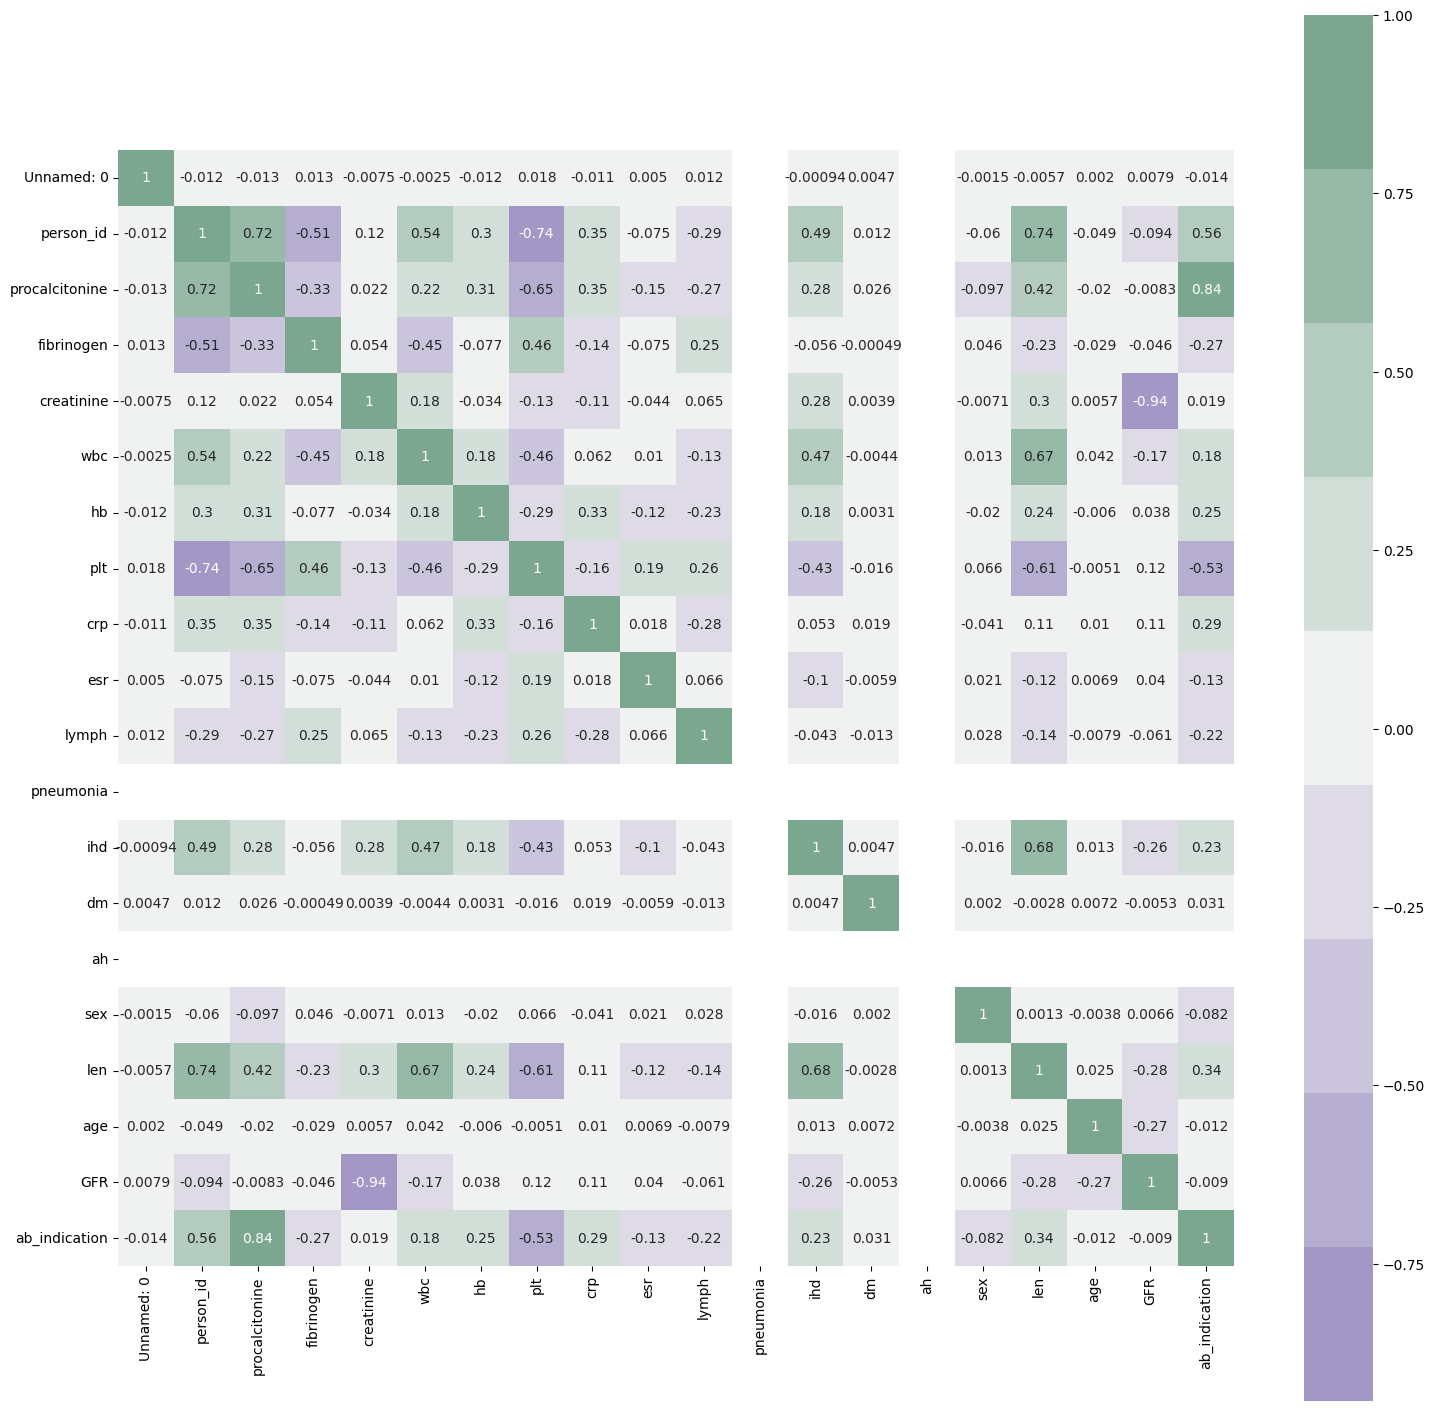

In [7]:
#Построим корреляционную матрицу
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = df.corr()
plt.subplots(figsize=(18, 18))
sns.heatmap(corrmat, cmap= cmap, annot=True, square=True);

In [8]:
columns =['plt', 'esr', 'fibrinogen', 'creatinine', 'wbc',  'crp','lymph']
df_no_ind = df[df['ab_indication'] == 0]
df_ind = df[df['ab_indication'] == 1]

In [28]:
df_no_ind

,Unnamed: 0,person_id,procalcitonine,fibrinogen,creatinine,wbc,hb,plt,crp,esr,lymph,pneumonia,ihd,dm,ah,sex,len,age,GFR,ab_indication
1,3822,158,0.000000,8.909846,1.030282,1.363834,143.647123,644.437365,58.343027,34.424705,23.300684,1,0,0,0,1,17,56,60.894798,0
2,915492,342,0.000000,7.092240,1.027174,25.710224,130.864644,483.261016,0.800000,25.493102,27.004637,1,0,0,0,1,34,56,61.117621,0
3,641908,108,0.134918,13.265546,0.707201,0.410000,141.945473,477.671705,7.526411,46.599795,17.167563,1,0,0,0,1,26,56,95.972393,0
4,89879,108,0.000000,15.336425,1.094880,12.546527,120.607466,704.633325,27.180197,35.411333,15.268175,1,0,0,0,1,28,56,56.578279,0
5,744110,980,0.324985,9.899282,1.265045,7.001120,125.988145,166.613698,0.800000,27.280940,12.404405,1,1,0,0,1,33,48,50.257856,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41224,718264,706,0.112622,11.122910,0.954530,13.101311,141.795781,374.247891,21.111733,19.814036,12.839993,1,1,0,0,1,42,56,66.784947,0
41225,556216,1103,0.199631,7.135134,1.099085,36.772744,137.856675,178.047896,48.956390,17.813114,0.010000,1,0,0,0,1,39,35,65.268376,0
41227,144924,1013,0.335003,4.822600,0.905691,19.587708,136.475023,261.638296,115.226867,41.099277,10.731909,1,0,0,0,1,28,35,82.474743,0
41229,818312,1103,0.125672,2.440000,0.957168,39.037341,163.876818,161.291325,127.079600,22.661706,13.759877,1,1,0,0,1,52,26,82.177240,0


In [10]:
import warnings
warnings.filterwarnings('ignore')
for i in columns:
  lst1 = df_no_ind[i]
  lst2 = df_ind[i]
  shapiro_test = stats.shapiro(lst1) # тест шапиро-уилка
  shapiro_test2 = stats.shapiro(lst2) # тест шапиро-уилка
  if shapiro_test[1] < .05:
    print('Данные {0} распределены ненормально,\
           p-value - {1}'.format(i,  shapiro_test[1]))
  if shapiro_test2[1] < .05:
    print('Данные {0} распределены ненормально,\
           p-value - {1}'.format(i,  shapiro_test2[1]))
  else:
    pass

Данные plt распределены ненормально,           p-value - 1.7142533019814427e-20
Данные plt распределены ненормально,           p-value - 0.0
Данные esr распределены ненормально,           p-value - 1.1145927985239595e-40
Данные esr распределены ненормально,           p-value - 1.4016444175928051e-30
Данные fibrinogen распределены ненормально,           p-value - 9.587672119282562e-20
Данные fibrinogen распределены ненормально,           p-value - 4.379362085706425e-27
Данные creatinine распределены ненормально,           p-value - 1.95159155019103e-23
Данные creatinine распределены ненормально,           p-value - 3.3187122212667564e-13
Данные wbc распределены ненормально,           p-value - 0.0
Данные wbc распределены ненормально,           p-value - 9.937696198009841e-29
Данные crp распределены ненормально,           p-value - 0.0
Данные crp распределены ненормально,           p-value - 9.361197117922101e-34
Данные lymph распределены ненормально,           p-value - 1.46516323598696

p-value ниже 0.05, т.о мы  отвергаем нулевую гипотезу о нормальности распределения и будем работать с данными используя непараметрические стат.методы

In [11]:
def Basic_statistics(lst_1, lst_2):
    """
    Функция "Базовые статистики"

    На вход получает 2 списка данных для сравнения.
    На выходе получаем p-values, при сравнении признаков.
    В частности: показаны, не показаны антибиотики
    """
    res_kw = kruskal(lst_1, lst_2)## краскела уолиса
    anova = stats.f_oneway(lst_1, lst_2) #тест анова
    return res_kw[1],  anova[1]

In [12]:
for col in columns:
  lst1 = df_no_ind[col]
  lst2 = df_ind[col]
  kw =  Basic_statistics(lst1, lst2)[0]
  an =  Basic_statistics(lst1, lst2)[1]
  if kw < .05:
    print('Данные {0} статисически значимо различаются в подгруппах,\
           p-value - {1}, тест Крускала-Уоллиса'.format(col,  kw))
  if an < .05:
    print('Данные {0} статисически значимо различаются в подгруппах,\
           p-value - {1}, тест Анова'.format(col,  an))
  else:
    pass


Данные plt статисически значимо различаются в подгруппах,           p-value - 0.0, тест Крускала-Уоллиса
Данные plt статисически значимо различаются в подгруппах,           p-value - 0.0, тест Анова
Данные esr статисически значимо различаются в подгруппах,           p-value - 2.7536251235414657e-121, тест Крускала-Уоллиса
Данные esr статисически значимо различаются в подгруппах,           p-value - 2.1921373115857108e-126, тест Анова
Данные fibrinogen статисически значимо различаются в подгруппах,           p-value - 0.0, тест Крускала-Уоллиса
Данные fibrinogen статисически значимо различаются в подгруппах,           p-value - 0.0, тест Анова
Данные creatinine статисически значимо различаются в подгруппах,           p-value - 0.003026493786471801, тест Крускала-Уоллиса
Данные creatinine статисически значимо различаются в подгруппах,           p-value - 0.0003838304871477176, тест Анова
Данные wbc статисически значимо различаются в подгруппах,           p-value - 9.49496142847372e-224, 

#### Выводы:


- 1.   В подгруппах есть  статистически значимые различия
- 2.   На данном этапе есть основание полагать, что есть некая закономерность в анализах у пациентов с показаниями к антибиотикотерапии

In [13]:
from sklearn.model_selection import train_test_split

In [45]:
# разделяем набор данных на тренировочную, тестовую и валидационную части и нормализуем данные
X = df.drop(['Unnamed: 0', 'person_id', 'ab_indication'], axis=1)
Y = df['ab_indication']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    stratify = Y,
                                                    random_state = 42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,
                                                  test_size = 0.30,
                                                  stratify = Y_train,
                                                  random_state = 42)

In [46]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(X_val.shape)
print(Y_val.shape)

(17483, 17)
(17483,)
(10704, 17)
(10704,)
(7493, 17)
(7493,)


**Этап построения модели машинного обучения**

---
Стандартные шаги перед обучением (стандартизация/нормализаця), решение необходомости ресамплинга из-за дисбаланса данных, выбор параметров модели и бизнесс логика - ***ваше домашнее задание***


Наиболее очевидной бизнес-логикой из представленных данных является Оптимизация распределения препарата:
        анализ предсказанных вероятностей использования препарата позволит определить регионы или клиники, где спрос на препарат может быть выше. Это позволит оптимизировать распределение препарата среди лечебных учреждений на основе результатов анализов.

Используем простую модель логистической регрессии и посмотрим, как она справится с задачей классификации назначения антибиотиков. Будем использовать библиотеку scikit-learn для построения модели и оценки ее производительности.


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score

Так как данные не сбалансированы, обязательно вводим веса классов `class_weight='balanced'`.

In [47]:
# Создание и обучение модели логистической регрессии
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, Y_train)

# Оценка модели на валидационном наборе данных
Y_val_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(Y_val, Y_val_pred))
print(classification_report(Y_val, Y_val_pred))

Validation Accuracy: 0.9817162685172828
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5630
           1       0.93      1.00      0.96      1863

    accuracy                           0.98      7493
   macro avg       0.97      0.99      0.98      7493
weighted avg       0.98      0.98      0.98      7493



In [48]:
# Финальная оценка модели на тестовом наборе данных
Y_test_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(Y_test, Y_test_pred))
print(classification_report(Y_test, Y_test_pred))

Test Accuracy: 0.9785127055306427
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      8042
           1       0.92      1.00      0.96      2662

    accuracy                           0.98     10704
   macro avg       0.96      0.99      0.97     10704
weighted avg       0.98      0.98      0.98     10704



In [49]:
# Предсказание вероятностей классов для валидационной выборки
Y_val_pred_proba = model.predict_proba(X_val)[:, 1]

# Вычисление ROC-AUC для валидационной выборки
roc_auc = roc_auc_score(Y_val, Y_val_pred_proba)
print("ROC-AUC на валидационной выборке:", roc_auc)

ROC-AUC на валидационной выборке: 0.9997992122943856


In [50]:
# Предсказание вероятностей классов для валидационной выборки
Y_test_pred_proba = model.predict_proba(X_test)[:, 1]

# Вычисление ROC-AUC для валидационной выборки
roc_auc = roc_auc_score(Y_test, Y_test_pred_proba)
print("ROC-AUC на тестовой выборке:", roc_auc)

ROC-AUC на тестовой выборке: 0.9997861060387138


__*Комментарии преподавателя:*__<br>
*Александр Алексеюк・Преподаватель<br>*

>Здравсвтуйте.
>
>1) вы не "продали" мне своё решение. Если бы я был вашим менеджером, я бы сказал: а какой смысл выделять ресурс на разработу вашего решения, если я не вижу никакой бизнес/общественной пользы?  
2) Вы "потрогали" метрики. Но не объяснили какие поставили себе ограничения и к чему стремились  
3) Вы допуслити серьёзную ошибку, непозволительную для продакшна: вы не исключили из анализа прокальцитонин, который являлся маркером показания к АБ терапии, тем самым, ваша модель просто предсказывает то, что мы и так "руками" назначили: если прокальцитонин 0.45 и выше - 1, иначе - 0  
Понятное дело, что это "игрушечное" задание и у вас, возможно, совсем нет времени на то, чтобы решать то, что не будет использоваться, но, тут уже вопрос привычки: нельзя привыкать делать явную лажу.

>Я, надеюсь, что вы не обидетесь на мой довольно жёсткий ответ, но тут я оцениваю не вас как специалиста, а только то, что вы сделали.
<br>


In [ ]:
# скачать, если не установлено
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_lg-0.5.1.tar.gz

In [17]:
import re
import time
import spacy
import gensim
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# прочитаем наши датасеты, где таргет_вокаб - это то, к чему мы хотим превести, а ту_мап - что мы хотим перевести
adverse_effects = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GB/22_4/data/to_find', sep = '|')
CUIs = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GB/22_4/data/концепты.tsv', sep = '\t')
adverse_effects.head()

In [ ]:
CUIs.head()

In [20]:
# Загрузка модели для английского языка
nlp = spacy.load("en_core_sci_lg")

In [21]:
stop_words = ['noc', 'nos', '[d]', 'unknown_unit', '|', 'see comment', 'due', 'nec', 'unspecified', '[v]', '(see comments)']
# убрать ненужные слова (если, конечно, они вообще есть)
adverse_effects['adv_name_processed'] = adverse_effects['Text'].apply(lambda x: re.sub(r"\s+", " ", str(x).encode('ascii', 'ignore').decode()) if isinstance(x, str) else str(x))
CUIs['concept_name_processed'] = CUIs['CONCEPT'].apply(lambda x: re.sub(r"\s+", " ", str(x.encode('ascii', 'ignore').decode())))

In [22]:
# убрать пунктуацию, символы
adverse_effects['adv_name_processed'] = adverse_effects['adv_name_processed'].map(lambda x: re.sub('[,\.!;?)%(\'\":\-]', '', x))
CUIs['concept_name_processed'] = CUIs['concept_name_processed'].map(lambda x: re.sub('[,\.!;?)%(\'\":\-]', '', x))

In [23]:
# из верхнего регистра переведём всё в нижний
adverse_effects['adv_name_processed'] = adverse_effects['adv_name_processed'].map(lambda x: x.lower())
CUIs['concept_name_processed'] = CUIs['concept_name_processed'].map(lambda x: x.lower())

In [24]:
# уберём стоп слова
adverse_effects['adv_name_processed'] = adverse_effects['adv_name_processed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
CUIs['concept_name_processed'] = CUIs['concept_name_processed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [25]:
def tokenize(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_punct and not token.is_space]
    return tokens

In [26]:
start_time = time.time()

adverse_effects['adv_name_processed'] = adverse_effects['adv_name_processed'].apply(tokenize)
CUIs['concept_name_processed'] = CUIs['concept_name_processed'].apply(tokenize)

elapsed_time = (time.time() - start_time)/60
print(f"Затраченное время: {elapsed_time:.1f} секунд(ы)")

Затраченное время: 0.2 секунд(ы)


In [27]:
def lemmatize(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    return lemmatized_tokens

In [28]:
start_time = time.time()
# Применение функции к вашему столбцу
adverse_effects['adv_name_processed'] = adverse_effects['adv_name_processed'].apply(lambda x: lemmatize(' '.join(x)))
CUIs['concept_name_processed'] = CUIs['concept_name_processed'].apply(lambda x: lemmatize(' '.join(x)))
elapsed_time = (time.time() - start_time)/60
print(f"Затраченное время: {elapsed_time:.1f} секунд(ы)")

Затраченное время: 0.2 секунд(ы)


In [ ]:
adverse_effects.head(10)

In [ ]:
CUIs.head(10)

In [31]:
adverse_effects['adv_name_processed'] = adverse_effects['adv_name_processed'].apply(lambda x: sorted(x))
CUIs['concept_name_processed'] = CUIs['concept_name_processed'].apply(lambda x: sorted(x))

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

In [ ]:
!wget https://ftp.ncbi.nlm.nih.gov/pub/lu/Suppl/BioSentVec/BioWordVec_PubMed_MIMICIII_d200.vec.bin

In [38]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# Replace 'path_to_glove_file/glove.6B.300d.txt' with your GloVe file path
glove_file = 'glove.6B.300d.txt'

# Convert GloVe format to Word2Vec format
word2vec_temp_file = get_tmpfile("glove_word2vec.txt")
glove2word2vec(glove_file, word2vec_temp_file)

# Load GloVe embeddings using Gensim
glove_model = KeyedVectors.load_word2vec_format(word2vec_temp_file)

In [ ]:
# Загрузите предварительно обученную модель встраивания слов
# model_path = 'BioWordVec_PubMed_MIMICIII_d200.vec.bin' # скачать здесь https://github.com/ncbi-nlp/BioSentVec
# word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True)

In [36]:
# Функция для векторизации текста с использованием BioWordVec
def vectorize_text_with_gensim_embeddings(text, model):
    tokens = text.split()
    vectors = [model[token] for token in tokens if token in model]
    if vectors:
        return np.mean(vectors, axis=0)  # Усреднение векторов
    else:
        return np.zeros(model.vector_size)  # Возвращает нулевой вектор, если нет известных слов

In [39]:
start_time = time.time()
# Применение функции к медицинским терминам в обоих наборах данных
adverse_effects['adv_eff_vector'] = adverse_effects['adv_name_processed'].apply(lambda x: vectorize_text_with_gensim_embeddings(' '.join(x), glove_model))
CUIs['CUI_vector'] = CUIs['concept_name_processed'].apply(lambda x: vectorize_text_with_gensim_embeddings(' '.join(x), glove_model))
# Удаление строк с отсутствующими векторами
adverse_effects = adverse_effects.dropna(subset=['adv_eff_vector'])
CUIs = CUIs.dropna(subset=['CUI_vector'])
elapsed_time = (time.time() - start_time)/60
print(f"Затраченное время: {elapsed_time:.1f} секунд(ы)")

Затраченное время: 0.0 секунд(ы)


In [40]:
start_time = time.time()
num_top_matches = 2
v1 = np.vstack(adverse_effects['adv_eff_vector'])
v2 = np.vstack(CUIs['CUI_vector'])
elapsed_time = (time.time() - start_time) / 60
print(f"Затраченное время: {elapsed_time:.1f} секунд(ы)")

Затраченное время: 0.0 секунд(ы)


In [41]:
similarity = cosine_similarity(v1, v2)
tops = (-similarity).argsort()[:, :num_top_matches]

joined_table = pd.concat(
    [pd.concat(
        [adverse_effects.loc[[i], ['Text', 'id']].reset_index(drop=True),
         CUIs.loc[[t], ['CUI', 'CONCEPT']].reset_index(drop=True),
         pd.Series(similarity[i][t], name='Similarity')], axis= 1
    )
     for i in range(0, len(adverse_effects)) for t in tops[i]]
).reset_index(drop=True)

elapsed_time = (time.time() - start_time) / 60
print(f"Затраченное время: {elapsed_time:.1f} секунд(ы)")

Затраченное время: 0.1 секунд(ы)


In [ ]:
joined_table.head(30)